In [1]:
import geopandas as gpd
import numpy as np
import wget

from tqdm.auto import tqdm

In [2]:
lidar_fishnet = gpd.read_file('lidar_fishnet_D96TM/LIDAR_FISHNET_D96.shp')
krokar = gpd.read_file('krokar/ODSC0654_region.shp')
krokar.crs = lidar_fishnet.crs

lidar_fishnet.to_crs({'init': 'epsg:32633'}, inplace=True)
krokar.to_crs({'init': 'epsg:32633'}, inplace=True)

/home/mlubej/work/base/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/mlubej/work/base/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


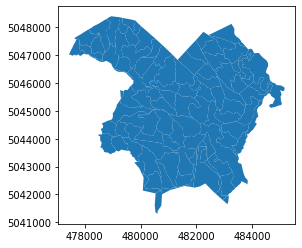

In [3]:
krokar.geometry.plot()

In [4]:
# get aera of interest
df = gpd.sjoin(lidar_fishnet, krokar)

to_remove = list(df.columns)
to_keep = ['OBJECTID', 'NAME', 'BLOK', 'geometry']
for x in to_keep:
    to_remove.remove(x)
    
df.drop(columns = to_remove, inplace=True)
df.drop_duplicates(inplace=True)

In [10]:
import pylas

# Directly read and write las
las = pylas.read('lidar_data/gkot_479_44.laz')

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

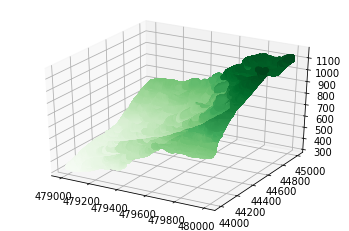

In [17]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = las.z
xdata = las.x
ydata = las.y
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');